In [1]:
#Andrew Owens
#Jared Hofer

In [2]:
import numpy as np
import cv2 as cv
import skimage
import scipy
from skimage import io
from pylab import *

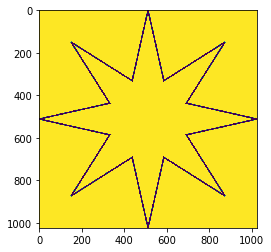

In [3]:
img = skimage.io.imread('http://etc.usf.edu/clipart/37700/37720/08-star_37720_lg.gif')
ret,thresh = cv.threshold(img,127,255,0)
im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
imshow(img)

In [37]:
cnt = contours[0]
print( cnt )

[[[1021  516]]

 [[1020  517]]

 [[1016  517]]

 ...

 [[ 516 1023]]

 [[1023 1023]]

 [[1023  516]]]


In [5]:
perimeter = cv.arcLength(cnt, True)
print(perimeter)

2445.2489042282104


In [6]:
xVal = []
yVal = []
for x in cnt:
    xVal.append(x[0][0])
    yVal.append(x[0][1])
#print(xVal)
#print(yVal)

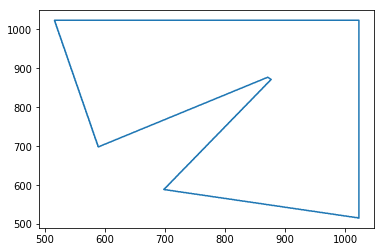

In [7]:
plt.plot(xVal, yVal)

In [8]:
sVal = []
for i, j in enumerate(xVal[:-1]):
    if i == 0:
        sVal.append(0 + abs(j - xVal[i+1]))
    else:
        sVal.append(sVal[i - 1] + abs(j - xVal[i+1]))
#print(sVal)

In [9]:
triplet = []
for i, j in enumerate(xVal[:-1]):
    triplet.append([xVal[i], yVal[i], sVal[i]])
print(triplet)

[[1021, 516, 1], [1020, 517, 5], [1016, 517, 6], [1015, 518, 9], [1012, 518, 10], [1011, 519, 14], [1007, 519, 15], [1006, 520, 18], [1003, 520, 19], [1002, 521, 23], [998, 521, 24], [997, 522, 27], [994, 522, 28], [993, 523, 32], [989, 523, 33], [988, 524, 36], [985, 524, 37], [984, 525, 40], [981, 525, 41], [980, 526, 45], [976, 526, 46], [975, 527, 49], [972, 527, 50], [971, 528, 54], [967, 528, 55], [966, 529, 58], [963, 529, 59], [962, 530, 63], [958, 530, 64], [957, 531, 67], [954, 531, 68], [953, 532, 71], [950, 532, 72], [949, 533, 76], [945, 533, 77], [944, 534, 81], [940, 534, 82], [939, 535, 85], [936, 535, 86], [935, 536, 89], [932, 536, 90], [931, 537, 94], [927, 537, 95], [926, 538, 98], [923, 538, 99], [922, 539, 103], [918, 539, 104], [917, 540, 107], [914, 540, 108], [913, 541, 112], [909, 541, 113], [908, 542, 116], [905, 542, 117], [904, 543, 121], [900, 543, 122], [899, 544, 125], [896, 544, 126], [895, 545, 129], [892, 545, 130], [891, 546, 134], [887, 546, 135], [

In [22]:
newTriplet = []
#for i in triplet:
#    newTriplet.append(np.interp(i[2], i[0], i[1]))
    
print(newTriplet)

[]


In [10]:
#numpy.interp(xVal, xVal, yVal)

In [11]:
x = 0
xTotal = 0
for i in xVal:
    xTotal = i
    x=x+1
print(x)
print(xTotal)
xAvg= xTotal/x
print(xAvg)

711
1023
1.4388185654008439


In [12]:
y =  0
yTotal = 0
for i in yVal:
    yTotal =  i
    y = y+1
print(y)
print(yTotal)
yAvg=yTotal/y
print(yAvg)

711
516
0.7257383966244726


In [13]:
xNew = []
for i in xVal:
    xNew.append(i-xAvg)
#print(xNew)

In [14]:
yNew = []
for i in yVal:
    yNew.append(i-yAvg)
#print(yNew)

In [36]:
a = np.meshgrid(xVal,yVal)
xnew2 = np.fft.fft2(a)
print(xnew2)

[[[ 3.72817116e+08+0.00000000e+00j -1.34229480e+07-2.22348199e+07j
    1.75350136e+07-1.70932115e+07j ...  3.33932607e+06+1.52296259e+07j
    1.75350136e+07+1.70932115e+07j -1.34229480e+07+2.22348199e+07j]
  [ 4.50128658e-08-1.59179766e-09j -2.13629477e-09-4.83751600e-09j
    1.47702666e-09-8.38322291e-10j ...  6.99886744e-10+3.11960957e-09j
    1.56031840e-09+1.51700208e-09j -2.70520534e-09+5.00872679e-09j]
  [ 5.42897033e-08-3.84451987e-09j -2.39360005e-09-3.24061949e-09j
    3.11011540e-09-2.38435842e-09j ...  4.43950922e-10+1.87036049e-09j
    3.47053913e-09+2.70530127e-09j -1.65202688e-09+3.52711015e-09j]
  ...
  [ 4.78129974e-08+5.08943695e-09j -2.25696932e-09-2.86821731e-09j
    2.75484902e-09-1.80914114e-09j ...  2.07896655e-10+2.05881014e-09j
    2.28462931e-09+2.60836406e-09j -1.90068263e-09+2.42565757e-09j]
  [ 5.42897033e-08+3.84451987e-09j -1.91303507e-09-3.54559342e-09j
    3.41508933e-09-1.92227670e-09j ...  1.75943527e-10+1.91425825e-09j
    3.05466559e-09+3.16738298e-0

In [15]:
#from scipy import interpolate
#interpolate.interp2d(xVal, yVal, len(xVal)*len(yVal), kind='cubic')

In [16]:
xx, yy = np.meshgrid(xVal,yVal)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(xVal, yVal, z, kind='cubic')
print(f)

NameError: name 'interpolate' is not defined

In [30]:

xnew = np.interp(xVal, xVal, yVal)
ynew = np.interp(yVal, xVal, yVal)
#ynew = np.arage(yVal)
#znew = f(xnew, yVal)
#plt.plot(xVal, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
#plt.show
#print(znew)
print(ynew)

[ 516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.  516.
  516.  516.  516.  516.  516.  516.  516.  516.  5